In [1]:
import quandl as qd
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_absolute_error

Importing plotly failed. Interactive plots will not work.


In [2]:
btc = pd.read_csv('https://data.bitcoinity.org/export_data.csv?currency=USD&data_type=price&exchange=coinbase&r=day&t=l&timespan=2y')

In [3]:
btc

Time           avg       max       min
0    2019-01-07 00:00:00 UTC   4021.321043   4053.03   3968.79
1    2019-01-08 00:00:00 UTC   4007.109617   4114.80   3943.36
2    2019-01-09 00:00:00 UTC   4010.608883   4042.20   3962.12
3    2019-01-10 00:00:00 UTC   3793.995311   4035.21   3560.00
4    2019-01-11 00:00:00 UTC   3637.067249   3699.99   3576.00
..                       ...           ...       ...       ...
726  2021-01-02 00:00:00 UTC  30762.886633  33300.00  29039.00
727  2021-01-03 00:00:00 UTC  33471.475999  34810.00  32008.62
728  2021-01-04 00:00:00 UTC  31817.779147  33666.99  27678.00
729  2021-01-05 00:00:00 UTC  32258.618890  34499.67  29891.13
730  2021-01-06 00:00:00 UTC  34905.970879  37000.00  33352.54

[731 rows x 4 columns]

In [4]:
btc['ds'] = pd.to_datetime(btc['Time'])
btc.drop(['max', 'min', 'Time'], axis=1, inplace=True)
btc.columns = ['y', 'ds']

In [5]:
btc['ds'] = btc['ds'].dt.tz_localize(None)

In [6]:
m = Prophet(daily_seasonality = True,
            yearly_seasonality = True,
            weekly_seasonality = True,                      
            seasonality_mode = 'multiplicative',
            interval_width = 0.8,
            changepoint_prior_scale = 0.1,
            changepoint_range = 0.99)
m.fit(btc)

In [7]:
period = 365
future = m.make_future_dataframe(periods=period, freq='D')
forecast = m.predict(future)
forecast['fact'] = btc['y'].reset_index(drop = True)

In [8]:
tomorrow = forecast.shape[0] - period + 1
today = tomorrow - 1
yesterday = tomorrow - 2
future_forecast = forecast[tomorrow:]

In [9]:
forecast.iloc[yesterday]

ds                            2021-01-06 00:00:00
trend                                      4806.2
yhat_lower                                33642.7
yhat_upper                                34727.1
trend_lower                                4806.2
trend_upper                                4806.2
daily                                     8.00068
daily_lower                               8.00068
daily_upper                               8.00068
multiplicative_terms                      6.11524
multiplicative_terms_lower                6.11524
multiplicative_terms_upper                6.11524
weekly                                  0.0098208
weekly_lower                            0.0098208
weekly_upper                            0.0098208
yearly                                   -1.89526
yearly_lower                             -1.89526
yearly_upper                             -1.89526
additive_terms                                  0
additive_terms_lower                            0


In [10]:
yhats = forecast['yhat']
facts = forecast['fact']
dates = forecast['ds']
print(mean_absolute_error(yhats[:today], facts[:today]))

315.4730727905254


Text(0.5, 1.0, 'Predicted vs Real Value')

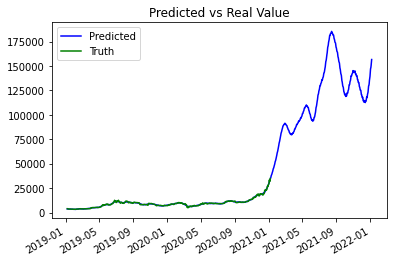

In [11]:
fig, ax = plt.subplots()
ax.plot(dates, yhats, color = 'blue', label = 'Predicted')
ax.plot(dates, facts, color = 'green', label = 'Truth')
plt.legend(loc="upper left")
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Predicted vs Real Value')

Text(0.5, 1.0, 'Predicting future prices for 365 days.')

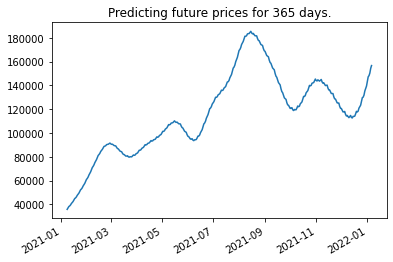

In [12]:
fig, ax = plt.subplots()
ax.plot(future_forecast['ds'], future_forecast['yhat'])
fig.autofmt_xdate()
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.set_title('Predicting future prices for 365 days.')